# The Rise of the Pitcher 
## Does the data support that this is the era of the pitcher or has the increase of homeruns counteracted all the strikeouts? 
### Data originated from Fangraphs a popular baseball sabermetric website. The data ranges from 1947-2020 


<img src="https://cdn.vox-cdn.com/thumbor/xuS3XQWQmFM5es9M2IsDxuOdQfI=/1400x1400/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/14787900/52970406.0.1406356884.jpg" width="600" height= "600"/>

# Data Dictionary 

| Season | Year of data collection                                                                                                                                                                |   |   |   |
|--------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|---|---|
| **Name**  | Name of the player                                                                                                                                                                     |   |   |   |
| **WHIP**   | Walks and Hits per Innings Pitched                                                                                                                                                     |   |   |   |
| **K/9**    | Strikeouts per 9 innings which is typical length of game.                                                                                                                              |   |   |   |
| **ERA**    | Earned Runs Average                                                                                                                                                                    |   |   |   |
| **BABIP**  | Batting Average of Balls in Play                                                                                                                                                       |   |   |   |
| **FIP**    | Fielding Independent Pitching. It is a statistic meant to measure a pitcher's effectiveness, taking plays that would involve the defense trying to field the ball out of the equation. |   |   |   |
| **WAR**   | Wins above replacement.                                                                                                                                                                |   |   |   |
| **IP**     | Innings Pitched       


# Importing Data and Pandas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px


In [2]:
def import_pitch():
    return pd.read_csv('/kaggle/input/fangraphs-custom-pitching-data-19472020/pitching_1947_2001.csv')

In [3]:
pitch = pd.read_csv('/kaggle/input/fangraphs-custom-pitching-data-19472020/pitching_1947_2001.csv')

# Let's take a look into the data!

In [4]:
pitch.head(20)

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,FIP-,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid
0,2020,Lance Lynn,Rangers,1,0,3,3,18.1,0.82,11.78,...,59,86.0,132,121,109.0,64,149,136,0.7,2520
1,2020,Randy Dobnak,Twins,2,1,3,3,15.0,0.87,4.80,...,65,87.0,54,65,82.0,68,61,75,0.4,23798
2,2020,Adrian Houser,Brewers,1,0,2,2,12.0,0.92,6.75,...,96,89.0,74,111,67.0,74,89,133,0.1,12718
3,2020,Shane Bieber,Indians,3,0,3,3,21.2,0.69,14.54,...,36,30.0,163,34,478.0,54,189,40,1.0,19427
4,2020,Trevor Bauer,Reds,2,0,3,3,19.1,0.57,14.90,...,42,44.0,164,55,298.0,46,193,65,0.9,12703
5,2020,Sonny Gray,Reds,3,0,3,3,18.2,0.70,13.50,...,55,39.0,148,71,209.0,56,171,82,0.7,12768
6,2020,Chris Bassitt,Athletics,1,0,3,3,16.2,0.90,8.10,...,52,101.0,91,59,154.0,70,99,64,0.6,12304
7,1968,Bob Gibson,Cardinals,22,9,34,34,304.2,0.85,7.92,...,65,NaN,136,70,194.0,71,148,76,8.6,1004662
8,2020,Zach Plesac,Indians,1,1,3,3,21.0,0.67,10.29,...,54,64.0,115,23,492.0,52,133,27,0.9,19979
9,2020,Alec Mills,Cubs,2,0,2,2,13.0,0.77,4.85,...,97,110.0,53,102,52.0,62,61,116,0.2,13834


In [5]:
pitch.shape

(5414, 30)

In [6]:
pd.DataFrame(pitch.dtypes, columns= ['Data Type'])

,Data Type
season,int64
name,object
team,object
W,int64
L,int64
G,int64
GS,int64
IP,float64
WHIP,float64
K/9,float64


# What is going on with pitching now? 

## What we know? 

Pitching now is unlike any other day in time. The average velocity is skyrocketing leading to more strikeouts, pitchers spin rate is higher than ever, and we have some of the best pitchers the world has ever seen. When I was growing up, a pitching staff might have two players throwing in the nineties and only a handful of people were hitting above 94. Nowadays the average pitch speed is around 93 mph. This is not a graph I made but check out the chart below: 

<img src="http://blogs.fangraphs.com/wp-content/uploads/2019/02/league-average-fastball.png" width="400" height= "400"/>

From the presentation Fred showed us in class, we know that hitting has taken a downturn other than homeruns. I wanted to see if this means that pitching stats have gotten better, or are all the homeruns counteracting the strikeouts and lack of hits. 

## Why is baseball the perfect sport for data analysis? 

Baseball is the best sport for high level stats because there are thousands of data points. In a season there are 162 games and any of these games have hundreds of things you can measure. This includes measurement of things such as ball speed leaving a baseball bat, spin rate leaving the pitchers hand, etc. This type of data is what they are calling sabermetrics. If you have seen moneyball, you know that this is originated by a man named Bill James. This type of thinking and data structuring is being used by every team that wishes to compete in the mlb (with a few exceptions of very poorly run organizations). This gives me a prime opportunity to measure data and determine how this increase in pitch quality has impacted the game. 



## Main Questions
* Does the data support that these stats have gotten better over time?  
* What does the bell curve look like for different stats such as  WHIP and FIP depending on different periods? 
* How has the decrease of innings pitched effected overal WAR?
* What does K/9 show in terms of change over time? 



# Data Cleanup 

The data is pretty clean. There are really not many nulls and the data types are mostly intigers and floats. The nulls that do exist are luckily stats that I do not need. Another good thing is I do not even have to change the date as Season is alreadty an integer and only one number. The main thing I need to change is seasons to ascending order for my sanity, and need to periodically change the index to season so I can show the lineage in time in a line chart. 

I will also need to group the data into timeframes that make sense. This is something I will go over later

## Where are the nulls? 

In [7]:
null_df = pd.DataFrame(pitch.isnull().sum(), columns=['Count of Nulls'])
null_df.index.name = 'Column Name'
null_df[ null_df['Count of Nulls'] > 0 ].sort_values('Count of Nulls', ascending=False)

,Count of Nulls
Column Name,
HR/FB,3930
xFIP,3930
xFIP-,3930
K/BB+,1


### This is very lucky. These stats are advanced stats that might not have been available for people in the older years, hence the nulls. Because these stats are too complicated to explain and break out in a 5 minute presentation I do not need them. Might as well keep them in for posperity.

## I now, for ease of use, want to sort all the seasons in ascending order. 

In [8]:
pitch.sort_values('season', inplace = True)
pitch.head(4)

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,FIP-,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid
4356,1947,Dave Koslo,Giants,15,10,39,31,217.1,1.40,3.56,...,105,NaN,96,93,104.0,98,94,91,2.0,1007118
2553,1947,Joe Hatten,Dodgers,17,8,42,32,225.1,1.40,3.04,...,95,NaN,82,114,72.0,98,83,115,3.1,1005495
2137,1947,Sam Zoldak,Browns,9,10,35,19,171.0,1.39,1.89,...,99,NaN,50,104,49.0,100,51,105,1.9,1014458
1138,1947,Spec Shea,Yankees,14,5,27,23,178.2,1.21,4.48,...,101,NaN,119,116,102.0,86,125,122,1.9,1011841


In [9]:
pitch['WHIP'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 4356    1.40
2553    1.40
2137    1.39
1138    1.21
1131    1.29
        ... 
983     1.00
723     0.83
670     1.00
5341    1.31
5413    1.91
Name: WHIP, Length: 5414, dtype: float64>

# Data Grouping 

I need to group the data into different ages so I can effectively compare the different eras of pitching. In order to do this, I have to find specific periods of time that make sense. What I will do is use two different stats to measure pitching effectiveness. I do not have time or have the stats Phd to explain why these two are the best measurements for pitching quality, but there is almost a consensus that WHIP and FIP are among the two best measurements. I will use them and a mix of history to decide how to break up the years. 


## I will start out by doing a scatter plot then do a line chart to see if either have a sign of change in year.

In [10]:
pitch.sort_values('season', inplace = True)

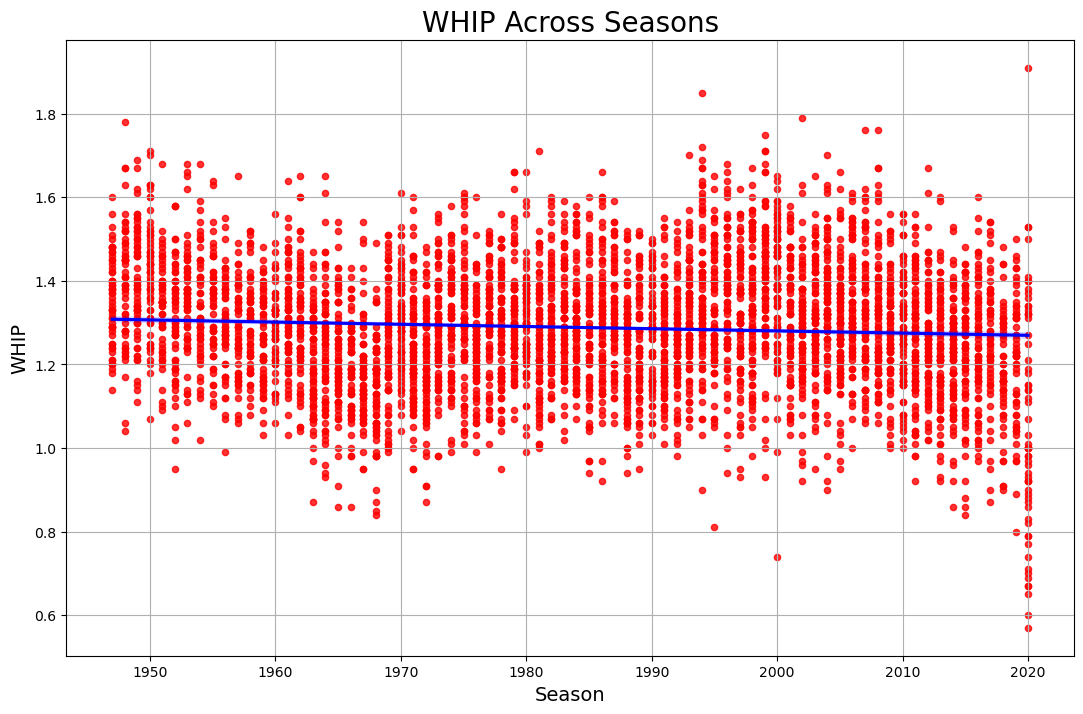

In [11]:
plt.figure(figsize=(13,8))

# generate a scatter plot with a regression line
sns.regplot(x='season', y='WHIP', data=pitch, scatter_kws={"s": 20, "color": 'red'}, line_kws={"color": "blue"})

plt.title('WHIP Across Seasons', fontsize=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('WHIP', fontsize=14)
plt.grid(True)
plt.show()


## In order to do a line chart I need to set season as the index

In [12]:
pitch_1 = import_pitch()
pitch_1.set_index('season', inplace=True)
pitch_1.head(3)

,name,team,W,L,G,GS,IP,WHIP,K/9,K%,...,FIP-,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid
season,,,,,,,,,,,,,,,,,,,,,
2020,Lance Lynn,Rangers,1,0,3,3,18.1,0.82,11.78,34.8%,...,59,86.0,132,121,109.0,64,149,136,0.7,2520
2020,Randy Dobnak,Twins,2,1,3,3,15.0,0.87,4.80,14.3%,...,65,87.0,54,65,82.0,68,61,75,0.4,23798
2020,Adrian Houser,Brewers,1,0,2,2,12.0,0.92,6.75,21.4%,...,96,89.0,74,111,67.0,74,89,133,0.1,12718


In [13]:
pitch_1.sort_values('season', inplace = True)
pitch.head(4)

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,FIP-,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid
4356,1947,Dave Koslo,Giants,15,10,39,31,217.1,1.40,3.56,...,105,NaN,96,93,104.0,98,94,91,2.0,1007118
1739,1947,Bill McCahan,Athletics,10,5,29,19,165.1,1.34,2.56,...,95,NaN,68,88,78.0,96,69,88,2.1,1008355
4233,1947,Joe Coleman,Athletics,6,12,32,21,160.1,1.45,3.65,...,112,NaN,97,90,107.0,104,97,90,0.9,1002427
4235,1947,Schoolboy Rowe,Phillies,14,10,31,28,195.2,1.42,3.40,...,100,NaN,92,57,163.0,99,91,56,2.2,1011259


In [14]:


fig = px.scatter(pitch, x='season', y='WHIP',
                 title='WHIP Across Seasons',
                 labels={
                     'season': 'Season',
                     'WHIP': 'WHIP'
                 },
                 hover_data=['WHIP'], # information to show when hovering over a point
                 color='WHIP', # you can also color the points based on WHIP values
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()



## I want to see how correlated this chart actually is. Even though there is a clear downward look if you just look at the best pitchers each year, this really doesn't do much. For that, I have the nifty salesmodels api! 

In [15]:
x = pitch['season']
y = pitch['WHIP']

In [16]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WHIP   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     29.00
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           7.52e-08
Time:                        16:53:23   Log-Likelihood:                 2679.4
No. Observations:                5414   AIC:                            -5355.
Df Residuals:                    5412   BIC:                            -5342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3347      0.194     12.012      0.0

## There does not appear to be much correlation. A perfect R- squared value is 1 and .005 is certainly in the no correlation threshold.  I want to take the data from the best performers, and see if there is a correlation of how many pitchers have a good WHIP. In other words, are the best pitchers progressively getting better. I am predicting so because it does look like it in the data chart. 

### I first need a cutoff point. I will use the means to separate the best pitchers. Remember the lower the WHIP the better the pitcher so I need it to encompass WHIPS less than the mean. 

In [17]:
pitch['WHIP'].mean()

1.2879774658293315

## Now for the function that groups them together. 

In [56]:
def stats_by_year(pitch_data, column_name, year_column_name, threshold):
  
    # Filter data to include only WHIP values below the threshold
    filtered_data = pitch_data[pitch[column_name] < threshold]

    # Group the filtered data by year and get the count of WHIP values below the threshold for each year
    grouped_data = filtered_data.groupby('season').size().reset_index(name=f"Count of {column_name} < {threshold}")

    return grouped_data


In [57]:
# Call the get_fips_below_threshold_by_year function to get the count of FIP values below 1.3 by year
best_whips = stats_by_year(pitch, "WHIP", "season", 1.3)



# Print the resulting dataframe
best_whips




,season,Count of WHIP < 1.3
0,1947,19
1,1948,16
2,1949,13
3,1950,11
4,1951,17
...,...,...
69,2016,44
70,2017,33
71,2018,42
72,2019,38


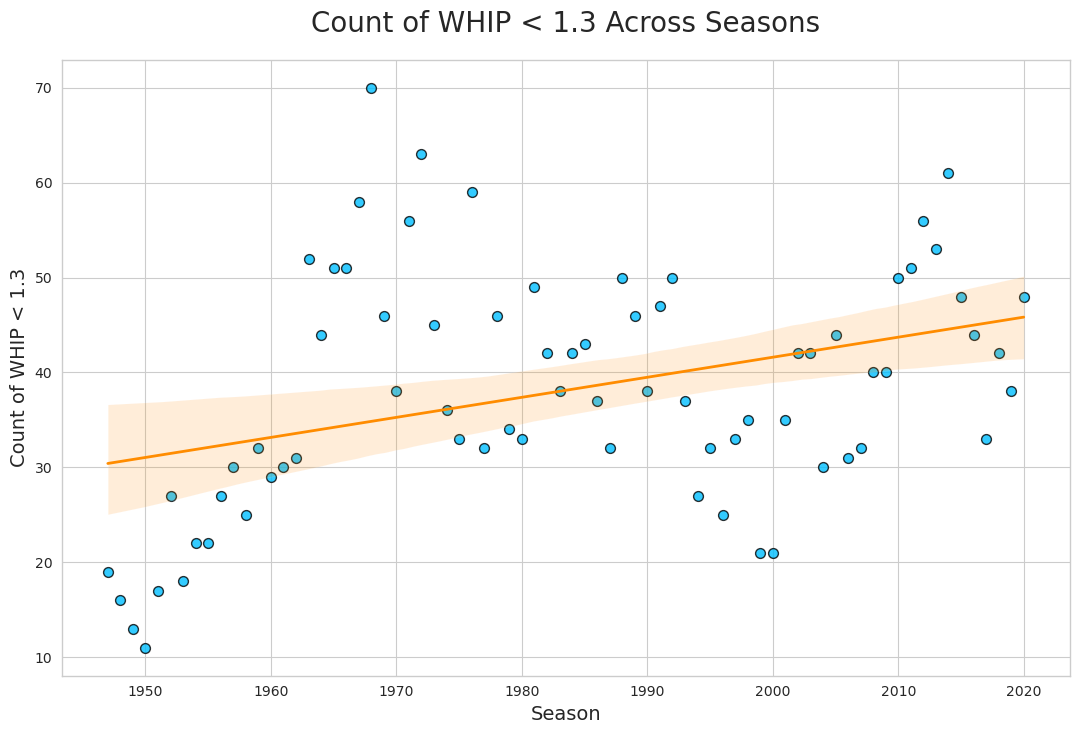

In [58]:


plt.figure(figsize=(13,8))

#  generate a scatter plot with a regression line
sns.regplot(x='season', y='Count of WHIP < 1.3', data=best_whips, 
            scatter_kws={"s": 50, "color": 'deepskyblue', 'edgecolor':'black'}, 
            line_kws={"color": "darkorange", "lw": 2})

plt.title('Count of WHIP < 1.3 Across Seasons', fontsize=20, pad=20)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Count of WHIP < 1.3', fontsize=14)
plt.grid(True)
plt.show()


## Let's see how this effects the r value.

In [21]:
x = best_whips['season']
y = best_whips['Count of WHIP < 1.3']

In [22]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Count of WHIP < 1.3   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.120
Method:                  Least Squares   F-statistic:                     10.95
Date:                 Sun, 21 Jan 2024   Prob (F-statistic):            0.00147
Time:                         16:53:23   Log-Likelihood:                -286.18
No. Observations:                   74   AIC:                             576.4
Df Residuals:                       72   BIC:                             581.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -380.7854    126.626     -3.00

## OK, granted its not the strongest R value by any stretch, but it's definitely at least showing a tad bit of correlation.

## However, the F- statistic tells a different story. F-statistic is a measure of how well the independent variable "season" predicts the dependent variable "Count of WHIP < 1.3".  The F-statistic of 10.95 with a probability (p-value) of 0.00147 indicates that there is less than a 0.15% chance of obtaining such a result if the null hypothesis (i.e., no relationship between the independent variable "season" and the dependent variable "Count of WHIP < 1.3") were true.

## Now for FIP 

In [23]:
import_pitch()

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,FIP-,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid
0,2020,Lance Lynn,Rangers,1,0,3,3,18.1,0.82,11.78,...,59,86.0,132,121,109.0,64,149,136,0.7,2520
1,2020,Randy Dobnak,Twins,2,1,3,3,15.0,0.87,4.80,...,65,87.0,54,65,82.0,68,61,75,0.4,23798
2,2020,Adrian Houser,Brewers,1,0,2,2,12.0,0.92,6.75,...,96,89.0,74,111,67.0,74,89,133,0.1,12718
3,2020,Shane Bieber,Indians,3,0,3,3,21.2,0.69,14.54,...,36,30.0,163,34,478.0,54,189,40,1.0,19427
4,2020,Trevor Bauer,Reds,2,0,3,3,19.1,0.57,14.90,...,42,44.0,164,55,298.0,46,193,65,0.9,12703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,2005,Jose Lima,Royals,5,16,32,32,168.2,1.66,4.27,...,132,124.0,69,108,64.0,122,64,100,-0.3,475
5410,2020,Madison Bumgarner,Diamondbacks,0,2,3,3,15.1,1.37,6.46,...,146,160.0,71,104,68.0,111,65,94,0.0,5524
5411,1994,Jim Deshaies,Twins,6,12,25,25,130.1,1.72,5.39,...,131,NaN,89,99,89.0,117,85,95,-0.3,1003228
5412,2020,Derek Holland,Pirates,0,1,3,3,16.1,1.53,8.82,...,170,111.0,97,97,99.0,124,91,92,-0.2,4141


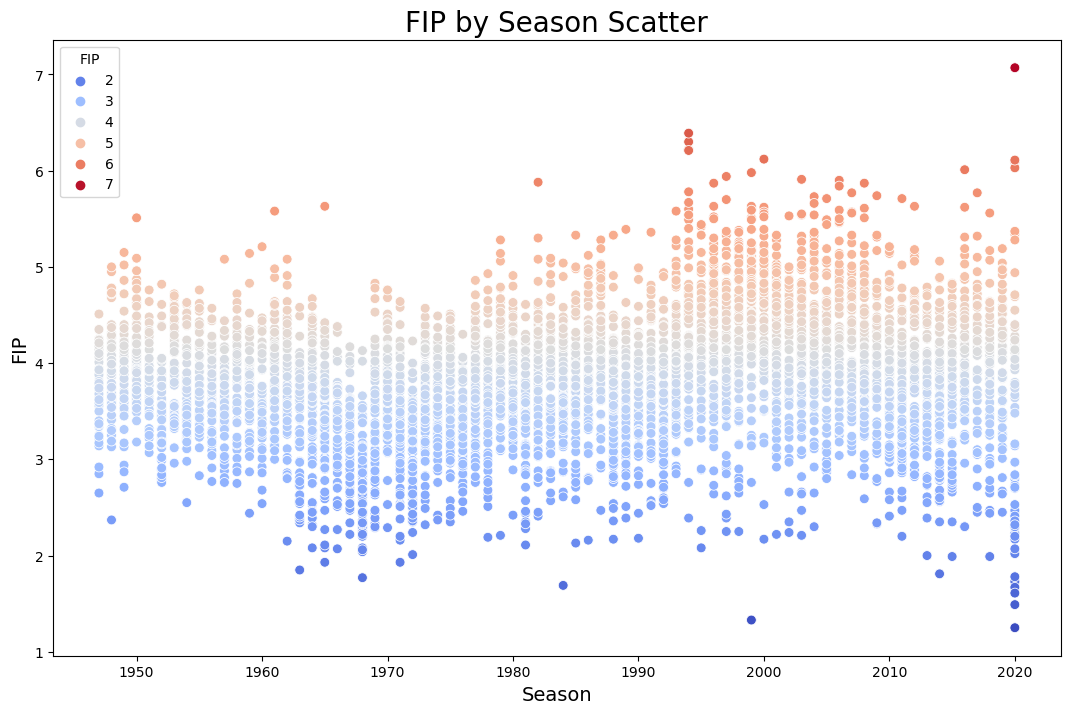

In [24]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))

# Generate a scatter plot with a color bar
scatter = sns.scatterplot(x='season', y='FIP', data=pitch, hue='FIP', palette='coolwarm', s=50)

# Set title
ax.set_title('FIP by Season Scatter', fontsize=20)

# Set axis labels
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('FIP', fontsize=14)

plt.show()


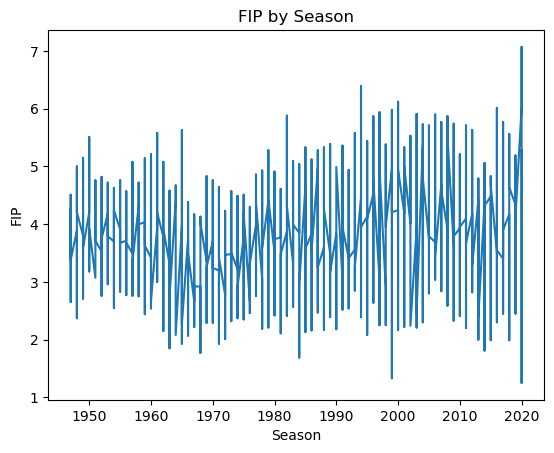

In [25]:
pitch_1['FIP'].plot()
plt.xlabel('Season')
plt.ylabel('FIP')
plt.title('FIP by Season');

## Hmm, looks prety even keeled 

## How does this look for r values?

In [26]:
x = pitch['season']
y = pitch['FIP']

In [27]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FIP   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           6.79e-56
Time:                        16:53:25   Log-Likelihood:                -5450.7
No. Observations:                5414   AIC:                         1.091e+04
Df Residuals:                    5412   BIC:                         1.092e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0992      0.873    -11.574      0.0

## There is not much correlation happening here, r value is quite low and the probability statistic is very high showing a high probability for the null hypotheses being right. I will do the same with count of people in each year with a low fip. Let's take a look at the best FIP's.

In [28]:
pitch_3 = import_pitch()

In [29]:
pitch['FIP'].mean()

3.8029811599556713

In [30]:
best_fips = stats_by_year(pitch, "FIP", "season", 3.8)
best_fips
  
   

,season,Count of FIP < 3.8
0,1947,35
1,1948,25
2,1949,24
3,1950,16
4,1951,27
...,...,...
69,2016,23
70,2017,17
71,2018,24
72,2019,21


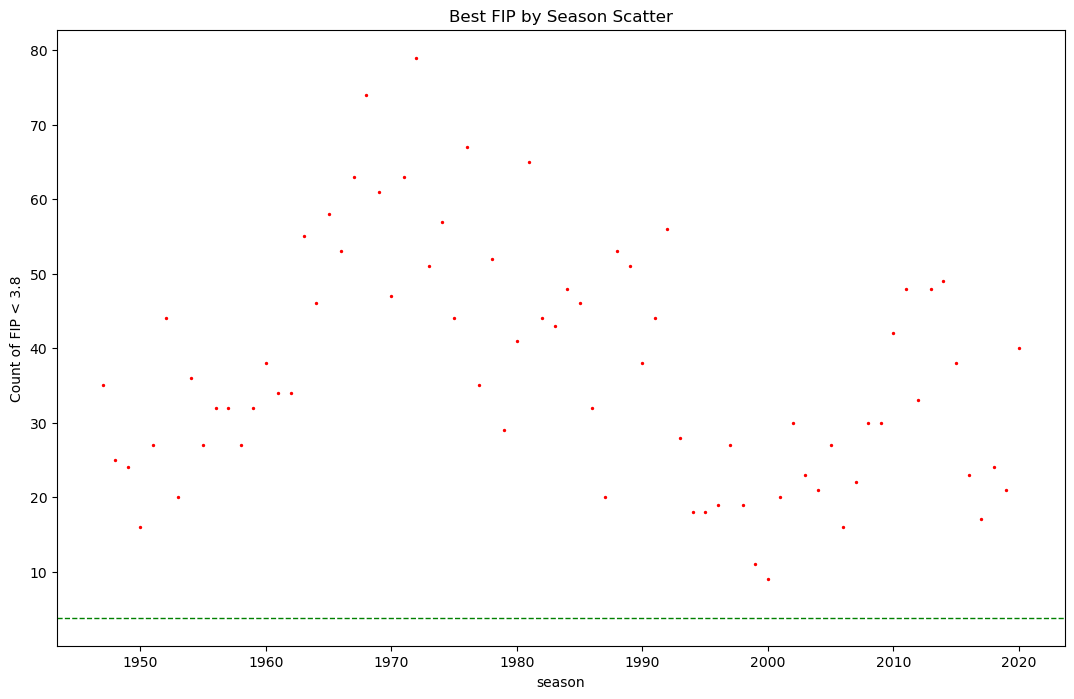

In [31]:
best_fips.plot(kind='scatter', x='season', y='Count of FIP < 3.8', figsize=(13,8), s=2, c= 'red')
plt.title('Best FIP by Season Scatter')

# Add a dotted horizontal line at y=3.8
plt.axhline(3.8, color='green', linestyle='dashed', linewidth=1)

plt.show()


# Green dotted line is the mean of all FIPS 3.8

In [32]:
x = best_fips['season']
y = best_fips['Count of FIP < 3.8']

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Count of FIP < 3.8   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     4.531
Date:                Sun, 21 Jan 2024   Prob (F-statistic):             0.0367
Time:                        16:53:25   Log-Likelihood:                -305.98
No. Observations:                  74   AIC:                             616.0
Df Residuals:                      72   BIC:                             620.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        389.3172    165.457      2.353      0.0

## Not too strong again in the R squared, but that just means its not truly linear. If you can see it kind of looks like a x^3 graph. The F-statistic will show more. We can see that the F-statistic has a value of 4.531 and a corresponding probability (p-value) of 0.0367. This means that, under the null hypothesis (i.e., the model has no predictive power), we would expect to see a statistic as large as 4.531 only 3.67% of the time. Since this probability is less than the conventional threshold of 5%, we reject the null hypothesis and conclude that the model as a whole is statistically significant.

# Grouping Data 
## I now need to group the data in a way that makes sense. I want to use the chart and a combination of history to make sure that it makes sense. I am creating these groups. 

1. 1947 - 1960 = This is the post segregation phase. The age was changing with the diversification of the players. 
2. 1961-1969 = This is what is called the dead ball 2 era. This was the age of the pitcher as well with pitchers like Sandy Koufax and Bob Gibson. These were some of the best players ever to play the game. You can see in the graph how this is lower than other spots in history as well. 
3. 1970 - 1985 = This was era of the introduction of the designated hitter. 
4. 1986 - 2005 = This is the steroid era. Also supported by the data, this was the age where testing for steroids was not common. Hitters like Barry Bonds, Sammy Sosa, and Mark McGwire. 
5. 2005 - 2010 = Post Steroid Era but a bit before you start seeing an increase in pitch speed and spin rate. 
6. 2011 - 2022 = Current era of the pitcher 

### I need to create a function then add a collumn to the chart 

#### First, lets reset the data 

In [33]:
pitch3= import_pitch()
pitch3

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,FIP-,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid
0,2020,Lance Lynn,Rangers,1,0,3,3,18.1,0.82,11.78,...,59,86.0,132,121,109.0,64,149,136,0.7,2520
1,2020,Randy Dobnak,Twins,2,1,3,3,15.0,0.87,4.80,...,65,87.0,54,65,82.0,68,61,75,0.4,23798
2,2020,Adrian Houser,Brewers,1,0,2,2,12.0,0.92,6.75,...,96,89.0,74,111,67.0,74,89,133,0.1,12718
3,2020,Shane Bieber,Indians,3,0,3,3,21.2,0.69,14.54,...,36,30.0,163,34,478.0,54,189,40,1.0,19427
4,2020,Trevor Bauer,Reds,2,0,3,3,19.1,0.57,14.90,...,42,44.0,164,55,298.0,46,193,65,0.9,12703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5409,2005,Jose Lima,Royals,5,16,32,32,168.2,1.66,4.27,...,132,124.0,69,108,64.0,122,64,100,-0.3,475
5410,2020,Madison Bumgarner,Diamondbacks,0,2,3,3,15.1,1.37,6.46,...,146,160.0,71,104,68.0,111,65,94,0.0,5524
5411,1994,Jim Deshaies,Twins,6,12,25,25,130.1,1.72,5.39,...,131,NaN,89,99,89.0,117,85,95,-0.3,1003228
5412,2020,Derek Holland,Pirates,0,1,3,3,16.1,1.53,8.82,...,170,111.0,97,97,99.0,124,91,92,-0.2,4141


In [34]:
def group_years(season):
    if season >= 1947 and season <= 1960:
        return "Post-Segregation"
    elif season >= 1961 and season <= 1969:
        return "Dead Ball 2"
    elif season >= 1970 and season <= 1985:
        return "Designated Hitter"
    elif season >= 1986 and season <= 2005:
        return "Steroid Era"
    elif season >= 2006 and season <= 2010:
        return "Post Steroid Era"
    else:
        return "Current Era"
pitch3['Pitching Eras'] = pitch3['season'].apply(group_years)
pitch3.head(12)
pitch3.tail(12) 

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid,Pitching Eras
5402,2005,Eric Milton,Reds,8,15,34,34,186.1,1.55,5.94,...,116.0,90,76,119.0,113,85,72,0.5,743,Steroid Era
5403,1999,Darryl Kile,Rockies,8,13,32,32,190.2,1.75,5.48,...,NaN,82,138,59.0,121,77,129,0.9,1163,Steroid Era
5404,2000,Jose Lima,Astros,7,16,33,33,196.1,1.62,5.68,...,NaN,84,81,104.0,112,81,78,-0.1,475,Steroid Era
5405,1994,Terry Mulholland,Yankees,6,7,19,19,115.0,1.57,5.32,...,NaN,87,73,120.0,107,86,71,0.5,665,Steroid Era
5406,1999,LaTroy Hawkins,Twins,10,14,33,33,174.1,1.71,5.32,...,NaN,85,83,102.0,115,82,80,1.4,729,Steroid Era
5407,2020,Mike Minor,Rangers,0,3,3,3,15.2,1.34,8.62,...,106.0,96,78,123.0,105,93,76,0.3,10021,Current Era
5408,2020,Wade LeBlanc,Orioles,1,0,3,3,14.1,1.19,5.02,...,116.0,56,34,164.0,93,56,34,-0.1,5221,Current Era
5409,2005,Jose Lima,Royals,5,16,32,32,168.2,1.66,4.27,...,124.0,69,108,64.0,122,64,100,-0.3,475,Steroid Era
5410,2020,Madison Bumgarner,Diamondbacks,0,2,3,3,15.1,1.37,6.46,...,160.0,71,104,68.0,111,65,94,0.0,5524,Current Era
5411,1994,Jim Deshaies,Twins,6,12,25,25,130.1,1.72,5.39,...,NaN,89,99,89.0,117,85,95,-0.3,1003228,Steroid Era


# What is the bell curve for WHIP and FIP to show how pitching has gotten better?
## Segment Analysis 

Now that we have created a grouping and a column for different pitching eras, I can group the different eras and find the mean to get a better judge of the stats.

In [35]:
pitch_grouped_by_eras = pitch3.groupby('Pitching Eras')
pitch_grouped_by_eras

In [36]:
pitch3.groupby('Pitching Eras')['WHIP'].mean()

Pitching Eras
Current Era          1.222265
Dead Ball 2          1.229027
Designated Hitter    1.283829
Post Steroid Era     1.310847
Post-Segregation     1.335426
Steroid Era          1.314866
Name: WHIP, dtype: float64

### I want to chart out the data, but need it in a specific order. To do this, I need to catagorize the data and set an era order. 

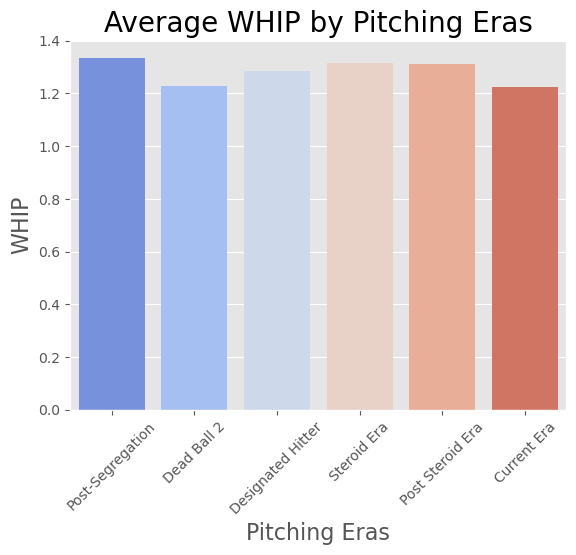

In [37]:
# define the desired order of the Pitching Eras
era_order = ['Post-Segregation', 'Dead Ball 2', 'Designated Hitter', 'Steroid Era', 'Post Steroid Era', 'Current Era']

# create a categorical data type with the desired order
era_cat = pd.CategoricalDtype(categories=era_order, ordered=True)

# group by the Pitching Eras and calculate the mean WHIP
whip_by_era = pitch3.groupby('Pitching Eras')['WHIP'].mean()

# convert the Pitching Eras column to a categorical data type with the desired order
whip_by_era.index = whip_by_era.index.astype(era_cat)

# sort the DataFrame based on the categorical order
whip_by_era = whip_by_era.sort_index()

# convert the Series back to a DataFrame
whip_reset = whip_by_era.reset_index()

# select a style template (optional)
plt.style.use('ggplot')

# create a figure and axis objects
fig, ax = plt.subplots()

# plot the bar chart with the manually set order
sns.barplot(x='Pitching Eras', y='WHIP', data=whip_reset, ax=ax, palette='coolwarm')

# adding the title and formatting labels
ax.set_title('Average WHIP by Pitching Eras', fontsize=20)
ax.set_xlabel('Pitching Eras', fontsize=16)
ax.set_ylabel('WHIP', fontsize=16)
ax.tick_params(axis='x', rotation=45)

# show the plot
plt.show();


## That difference between current era and the two before might not look big, but with this stat .2 is pretty large. This confirms that at least whip has gone down and is the lowest since Dead Ball 2.

## I want to also do a linear regression model using the statsmodels.api to see if the math actually supports this observation

## Now for FIP!

In [38]:
pitch_grouped_by_eras = pitch3.groupby('Pitching Eras')
pitch_grouped_by_eras

In [39]:
pitch3.groupby('Pitching Eras')['FIP'].mean()

Pitching Eras
Current Era          3.785939
Dead Ball 2          3.383142
Designated Hitter    3.612864
Post Steroid Era     4.090726
Post-Segregation     3.783405
Steroid Era          4.060926
Name: FIP, dtype: float64

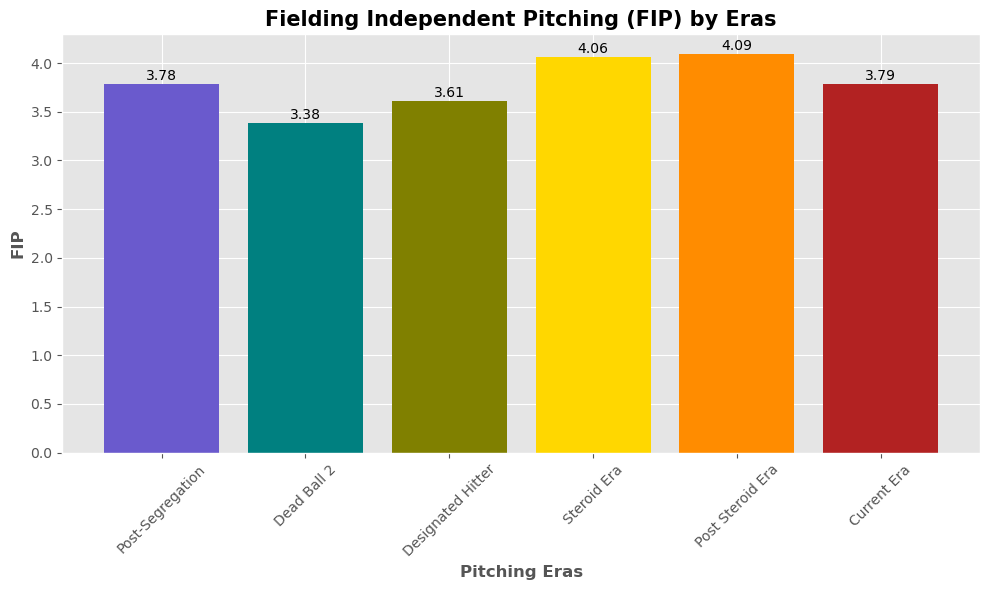

In [40]:
# define the desired order of the Pitching Eras
era_order = ['Post-Segregation', 'Dead Ball 2', 'Designated Hitter', 'Steroid Era', 'Post Steroid Era', 'Current Era']

# create a categorical data type with the desired order
era_cat = pd.CategoricalDtype(categories=era_order, ordered=True)

# group by the Pitching Eras and calculate the mean WHIP
fip_by_era = pitch3.groupby('Pitching Eras')['FIP'].mean()

# convert the Pitching Eras column to a categorical data type with the desired order
fip_by_era.index = fip_by_era.index.astype(era_cat)

# sort the DataFrame based on the categorical order
fip_by_era = fip_by_era.sort_index()

# convert the Series back to a DataFrame
fip_reset = fip_by_era.reset_index()

# create a new figure with a defined size
fig, ax = plt.subplots(figsize=(10, 6))

# set the bar color and plot the bar chart
colors = ['slateblue', 'teal', 'olive', 'gold', 'darkorange', 'firebrick']
bars = plt.bar(fip_reset['Pitching Eras'], fip_reset['FIP'], color=colors)

# set labels and title
ax.set_xlabel('Pitching Eras', fontsize=12, fontweight='bold')
ax.set_ylabel('FIP', fontsize=12, fontweight='bold')
ax.set_title('Fielding Independent Pitching (FIP) by Eras', fontsize=15, fontweight='bold')

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

# function to add data labels
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
                 round(yval, 2), ha='center', va='bottom')

# add data labels to bars
add_labels(bars)

# display the plot
plt.tight_layout()
plt.show();


## Looks like FIP is a little bit more ambiguous. It is still lower than the two previous eras, but clearly there was something going on in Dead Ball 2.

# How has the decrease of innings effected WAR?

## I want to see a scatterplot to see if there is any correlation between innings pitched and war

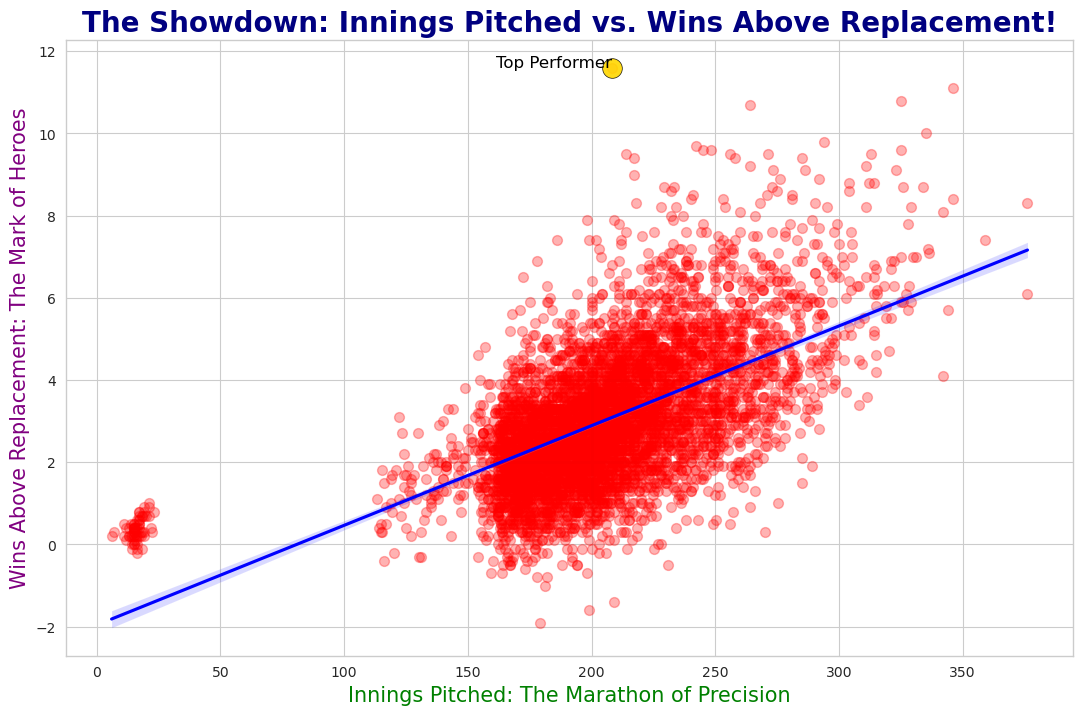

In [63]:


plt.figure(figsize=(13, 8))
sns.set_style("whitegrid")

# Adjust the scatter_kws 'alpha' value to increase transparency and reduce point size if needed
sns.regplot(x='IP', y='WAR', data=pitch, scatter_kws={'s': 50, 'color': 'red', 'alpha': 0.3}, line_kws={'color': 'blue'})

# Highlight a particular point, for example, the maximum WAR, with a larger, more opaque marker
max_war = pitch['WAR'].idxmax()
plt.scatter(pitch['IP'][max_war], pitch['WAR'][max_war], color='gold', s=200, edgecolor='black', alpha=0.9)
plt.text(pitch['IP'][max_war], pitch['WAR'][max_war], 'Top Performer', color='black', fontsize=12, ha='right')

# Title and labels with added flair
plt.title('The Showdown: Innings Pitched vs. Wins Above Replacement!', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Innings Pitched: The Marathon of Precision', fontsize=15, color='green')
plt.ylabel('Wins Above Replacement: The Mark of Heroes', fontsize=15, color='purple')

# Ensure that the plot does not display a legend
plt.legend([],[], frameon=False)

# Display the plot
plt.show()

## It does appear that the higher the innings pitched the higher the WAR. In the OLS Regression Results, the F-statistic is 2905, which indicates a high degree of significance. The probability value associated with the F-statistic (Prob (F-statistic)) is 0.00, which is less than the typical significance level of 5%. This means that the null hypothesis, which states that the independent variables have no effect on the dependent variable, can be rejected. Therefore, we can conclude that the independent variable "IP" has a statistically significant impact on the dependent variable "WAR". This does make logical sense, however, as the more you play the more valuable you become. What about different eras?

In [42]:
x = pitch['IP']
y = pitch['WAR']

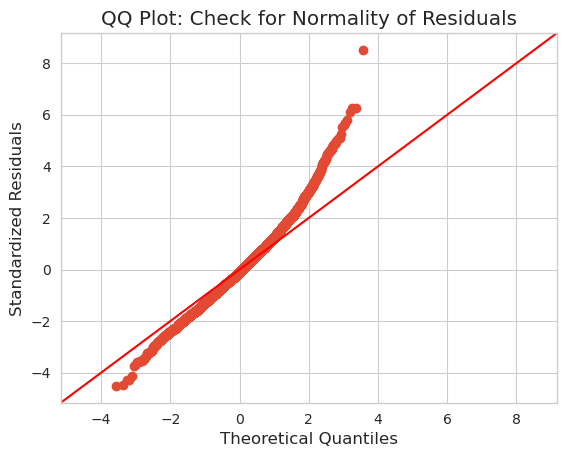

In [43]:

# Add a constant to the independent variable
X = sm.add_constant(pitch['IP'])

# Build OLS model
model = sm.OLS(pitch['WAR'], X)
results = model.fit()

# Get the residuals
residuals = results.resid

# Generate the QQ plot
fig = sm.qqplot(residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("QQ Plot: Check for Normality of Residuals")

# Show the plot
plt.show()


## This QQ chart depicts a positive skew. This indicates that there is a strong pressence of outliers that give larger values than expected. These outliers will actual significantly impact the mean of WAR to Innings Pitched. I believe this is the case because of how drastic the decrease in innings have been over the past few decades due to the noticable shift in the higher end of the standardized residuals. -4 to 8 refer to the range of values on the y axis of the Innings Pitched to War chart. This means that the higher outliers in WAR are also in the higher side of Innings Pitched. As this normally shows that we would need to manipulate and do a mathematical data tranformation, we can take some inferences aside from that and infer with an educated guess that the pitchers with extremely high Innings Pitched also have higher than median WAR's making them outliers.

In [44]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    WAR   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     2905.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:53:27   Log-Likelihood:                -9292.5
No. Observations:                5414   AIC:                         1.859e+04
Df Residuals:                    5412   BIC:                         1.860e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9595      0.094    -20.760      0.0

In [45]:
pitch3.groupby('Pitching Eras')['WAR'].mean()

Pitching Eras
Current Era          2.732873
Dead Ball 2          3.214992
Designated Hitter    3.087104
Post Steroid Era     3.143341
Post-Segregation     2.945997
Steroid Era          3.063102
Name: WAR, dtype: float64

In [46]:
pitch3.groupby('Pitching Eras')['IP'].mean()

Pitching Eras
Current Era          175.924448
Dead Ball 2          221.950558
Designated Hitter    219.138845
Post Steroid Era     197.614770
Post-Segregation     211.302414
Steroid Era          201.801001
Name: IP, dtype: float64

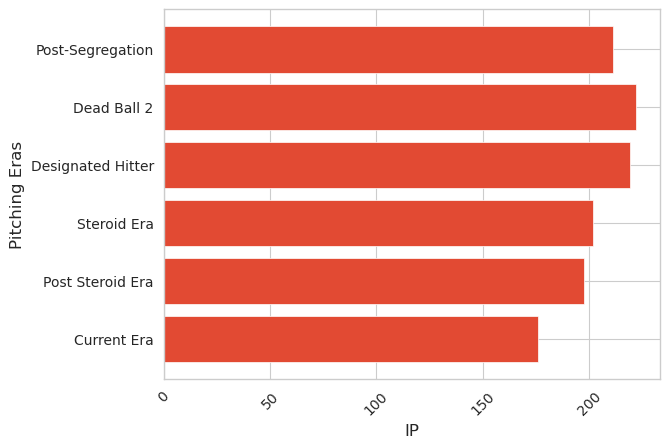

In [47]:
# define the desired order of the Pitching Eras
era_order = [ 'Current Era', 'Post Steroid Era', 'Steroid Era',  'Designated Hitter', 'Dead Ball 2', 'Post-Segregation']

# create a categorical data type with the desired order
era_cat = pd.CategoricalDtype(categories=era_order, ordered=True)

# group by the Pitching Eras and calculate the mean WHIP
ip_by_era = pitch3.groupby('Pitching Eras')['IP'].mean()

# convert the Pitching Eras column to a categorical data type with the desired order
ip_by_era.index = ip_by_era.index.astype(era_cat)

# sort the DataFrame based on the categorical order
ip_by_era = ip_by_era.sort_index()

# convert the Series back to a DataFrame
df = ip_by_era.reset_index()

# plot the bar chart with the manually set order
plt.barh(df['Pitching Eras'], df['IP'])
plt.xlabel('IP')
plt.ylabel('Pitching Eras')
plt.xticks(rotation=45)
plt.show()

## This clearly shows that there is a decrease in innings now than in the past. 

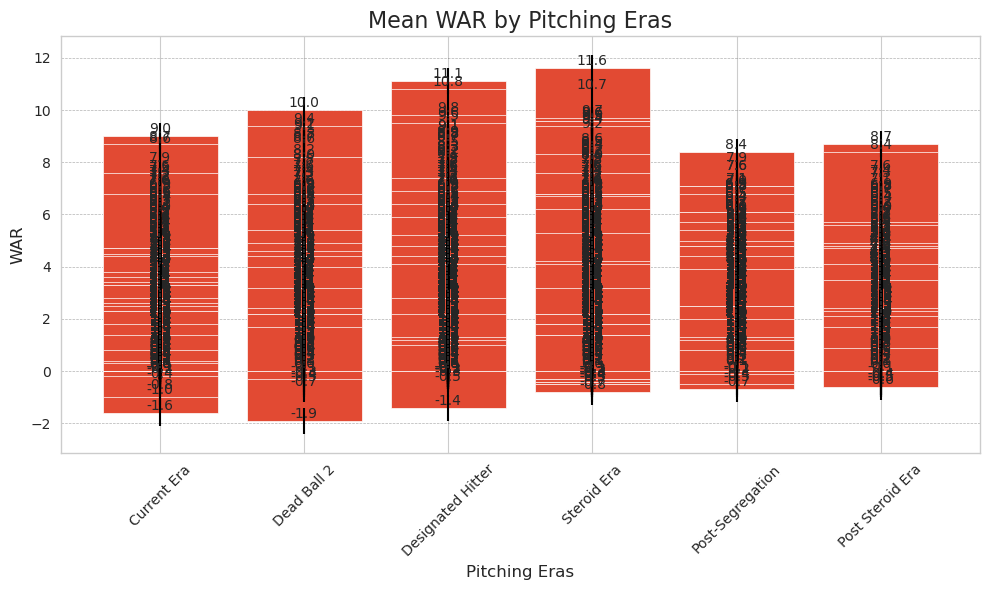

In [48]:
plt.figure(figsize=(10, 6))
bars = plt.bar(pitch3['Pitching Eras'], pitch3['WAR'], yerr=0.5)  # Assume 0.5 is the standard deviation, replace it with actual if available
plt.xlabel('Pitching Eras', fontsize=12)
plt.ylabel('WAR', fontsize=12)
plt.title('Mean WAR by Pitching Eras', fontsize=16)
plt.xticks(rotation=45)

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .005, round(yval, 2), ha='center', va='bottom')

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

# Annotate significant results
# plt.text('Steroid Era', 1.5, "Significant Result", ha='center', va='bottom')  # Adjust coordinates and text as needed

plt.tight_layout()
plt.show()



In [49]:
print

<function print>

## Interestingly enough, even though the scatterplot showed a clear relation, the mean of the WAR show a different story. This is not the same shape as the WHIP chart and that surprises me.

# What does the K/9 show in terms of changing over time? 

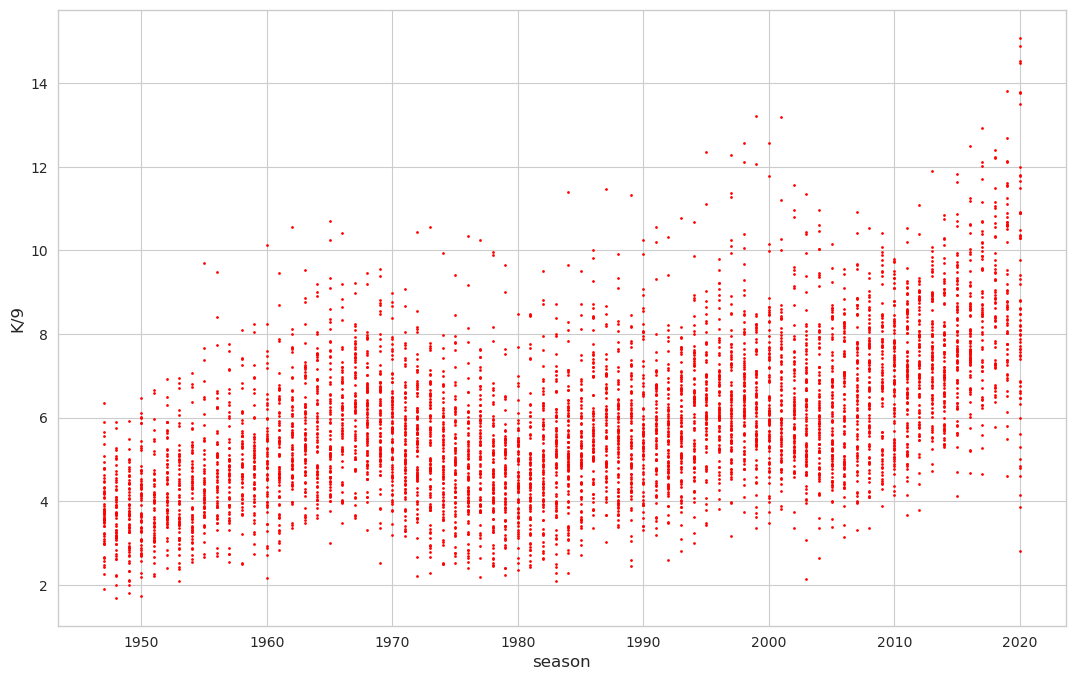

In [50]:
pitch.plot(kind='scatter', x='season', y='K/9', figsize=(13,8), s=2, c= 'red');


## WOW! Almost looks like a wave of low strikeouts to high strikeouts. However, the wave gets larger in the downward side every cycle. It is clear though that there is even a bigger jump in current era than normal however. Let's look further. 

In [51]:
pitch3.head()

,season,name,team,W,L,G,GS,IP,WHIP,K/9,...,xFIP-,K/9+,BB/9+,K/BB+,WHIP+,K%+,BB%+,WAR,playerid,Pitching Eras
0,2020,Lance Lynn,Rangers,1,0,3,3,18.1,0.82,11.78,...,86.0,132,121,109.0,64,149,136,0.7,2520,Current Era
1,2020,Randy Dobnak,Twins,2,1,3,3,15.0,0.87,4.80,...,87.0,54,65,82.0,68,61,75,0.4,23798,Current Era
2,2020,Adrian Houser,Brewers,1,0,2,2,12.0,0.92,6.75,...,89.0,74,111,67.0,74,89,133,0.1,12718,Current Era
3,2020,Shane Bieber,Indians,3,0,3,3,21.2,0.69,14.54,...,30.0,163,34,478.0,54,189,40,1.0,19427,Current Era
4,2020,Trevor Bauer,Reds,2,0,3,3,19.1,0.57,14.90,...,44.0,164,55,298.0,46,193,65,0.9,12703,Current Era


In [52]:
plt.figure(figsize=(10, 6))
colors = ['tab:blue' if era != 'Current Era' else 'tab:orange' for era in k_reset['Pitching Eras']]
bars = plt.bar(k_reset['Pitching Eras'], k_reset['K/9'], color=colors)

plt.xlabel('Pitching Eras', fontsize=12)
plt.ylabel('K/9', fontsize=12)
plt.title('Mean Strikeouts per 9 Innings by Pitching Eras', fontsize=16)
plt.xticks(rotation=45)

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + .005, round(yval, 2), ha='center', va='bottom')

# highlight the 'Current Era'
plt.text('Current Era', max(k_reset['K/9']) + 0.05, "Current Era: Most Strikeouts", ha='center', va='bottom', fontsize=10, color='tab:orange')

plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

plt.tight_layout()
plt.show()



NameError: name 'k_reset' is not defined

<Figure size 1000x600 with 0 Axes>

## That is an amazing jump. Since the first grouping of my data it has effectively doubled in value. 

# What have we learned? 

## I learned that we are in a remarkable time for pitching. WHIP is low, K/9 is highest it's ever been, WAR is high. However, I also learned that this is not the best time in history perhaps. Dead Ball Era 2 is living up to it's name. Pitching then was about if not better than it is now in terms of statistics. Makes sense as many of my pitching heros are members of that pitching era group. I am excited to extend this project after this year.  There are a ton of rule changes this year including restricting shifts, introducing a pitch clock, and expanding the size of the bases. 
